# Klasyfikacja zbioru CIFAR-10
Kod z książki "Deep learning i modelowanie generatywne"

02_03_deep_learning_conv_neural_network.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

**Dane**

In [2]:
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

**Budowa sieci**

In [3]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

* architektura z wykorzystaniem funkcjonalnego API - można budować sieć z rozgałęzieniami
* Konwolucja - pomnożenie pikseli filtra przez fragment obrazu i zsumowanie wyniku, wynik dodatni gdy część obrazu jest dopasowana do filtra
* Conv2D
* BatchNormalization - normalizacja partii, wagi pozostają w rozsądnym zakresie
* Dropout - zapobiega nadmiernemu dopasowaniu, wybiera losowy zestaw jednostek z poprzedniej warstwy i ustawia ich wyjście na zero

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0     

**Trenowanie sieci**

In [5]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

#model.save('cifar10_model2.h5') 

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2331 - accuracy: 0.9155 - val_loss: 1.1333 - val_accuracy: 0.7261
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2254 - accuracy: 0.9178 - val_loss: 1.2026 - val_accuracy: 0.7198
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2262 - accuracy: 0.9192 - val_loss: 1.1965 - val_accuracy: 0.7009
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2225 - accuracy: 0.9197 - val_loss: 1.1999 - val_accuracy: 0.7209
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2145 - accuracy: 0.9227 - val_loss: 1.2793 - val_accuracy: 0.6992
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2148 - accuracy: 0.9214 - val_loss: 1.2560 - val_accuracy: 0.7097
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2056 - accuracy: 0.9246 - val_loss: 1.1611 - val_accuracy:

**Analiza modelu**


In [12]:
#model = load_model('cifar10_model2.h5')
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 8ms/step - loss: 1.1711 - accuracy: 0.7239


[1.1711010932922363, 0.7239000201225281]

In [13]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

* preds - tablica o rozmiarach [10000, 10], wektor składający się z 10 klas prawdopodobieństw dla każdej obserwacji
* tablice konwertujemy do 1 prognozy z wykorzystaniem argmax
* axis = -1 - zwinięcie tablicy do ostatniego wymiaru 
* preds_single - [10000, 1]

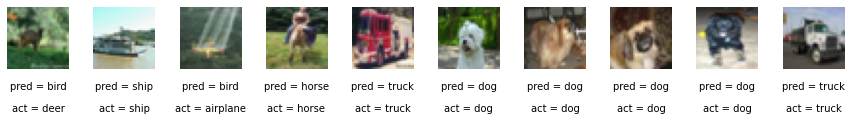

In [14]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)